## **0. 패키지 설치 - 설치 완료 후 커널 재시작**

In [2]:
#!pip install --upgrade pip
#!pip install kiwipiepy 
#!pip install wordcloud 

## **1. 라이브러리가져오기**

In [12]:
# 데이터 처리를 위한 라이브러리
import pandas as pd
from collections import Counter  
from kiwipiepy import Kiwi

In [13]:
# 그래프 생성을 위한 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [14]:
# 워드클라우드 생성을 위한 라이브러리
import numpy as np
from PIL import Image
from wordcloud import WordCloud

## **2. 데이터 준비하기**



### **2-1. 데이터 가져오기**
- csv파일로부터 데이터를 읽고, 데이터의 내용을 확인한다.



In [15]:
# 데이터 읽기
df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423




- 데이터의 정보를 확인한다.



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1587 entries, 3232 to 60111
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1587 non-null   object 
 1   Year     1587 non-null   int64  
 2   Total    1587 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 49.6+ KB



### **2-2. 데이터 전처리하기**
➊ NULL값이 존재하는 행 제거



In [29]:
# Null 값이 존재하는 행 제거
df = df.dropna()

len(df)

1587

### 데이터 필요한 만큼 처리하기

In [33]:
# 필요한 열만 가져오기 (Country, Year, Total)
df = df[['Country', 'Year', 'Total']]

# Country 열에서 'Global'이 포함된 행을 모두 삭제
df = df[df['Country'] != 'Global']

In [34]:
# Total 값을 Country별로 묶어 내림차순으로 정렬
df_grouped = df.groupby('Country').apply(lambda x: x.sort_values('Total', ascending=False)).reset_index(drop=True)

# Year에서 최근 5년만 필터링
# 우선 Year을 내림차순으로 정렬하고, Country별로 최근 5개의 연도만 남기기
df_sorted = df_grouped.sort_values(['Country', 'Year'], ascending=[True, False])
df_final = df_sorted.groupby('Country').head(5)

# 최종 정렬 결과 확인
print(df_final)

             Country  Year       Total
15         Australia  2021  391.187411
10         Australia  2020  399.922128
0          Australia  2019  416.356588
1          Australia  2018  416.283827
2          Australia  2017  414.358312
...              ...   ...         ...
1585  United Kingdom  2021  346.773181
1586  United Kingdom  2020  326.263199
1584  United Kingdom  2019  364.753306
1583  United Kingdom  2018  379.729755
1582  United Kingdom  2017  387.367141

[230 rows x 3 columns]


## **3. 데이터 시각화하기**

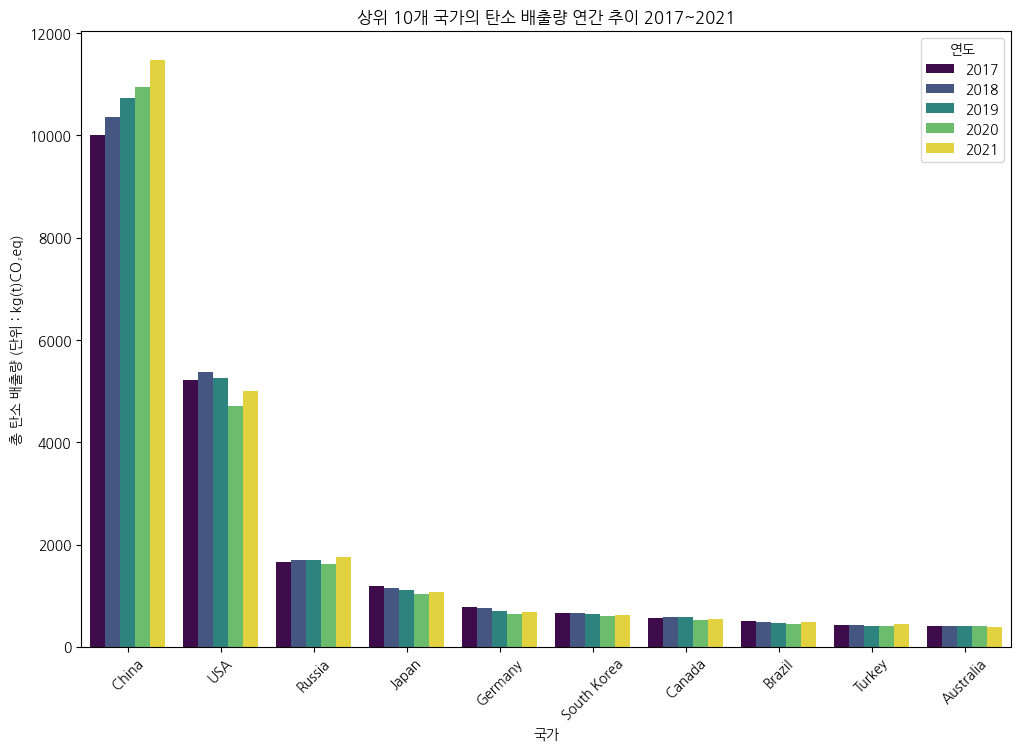

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# df_final 데이터프레임에서 상위 10개의 탄소 배출량을 가진 국가를 가져오기
top_10_countries = df_final.groupby('Country')['Total'].sum().nlargest(10).index
#wordcloud전용 상위 1만개 국가 불러오기
top_1000_countries = df_final.groupby('Country')['Total'].sum().nlargest(10000).index

df_top_10 = df_final[df_final['Country'].isin(top_10_countries)].copy()  # 명시적으로 복사본을 만듦
df_top_1000 = df_final[df_final['Country'].isin(top_1000_countries)].copy()  # 명시적으로 복사본을 만듦

# 나라별로 탄소 배출량 합계를 계산하고 내림차순으로 정렬
country_emissions = df_top_10.groupby('Country')['Total'].sum().sort_values(ascending=False)
sorted_countries = country_emissions.index
#워드클라우드용 데이터 만들기
wordcloud_country = df_top_1000.groupby('Country')['Total'].sum().sort_values(ascending=False)

# df_top_10를 내림차순으로 정렬된 국가 순서대로 재정렬
df_top_10['Country'] = pd.Categorical(df_top_10['Country'], categories=sorted_countries, ordered=True)

# 데이터프레임을 'Country' 순서로 정렬
df_top_10 = df_top_10.sort_values(by='Country', ascending=False)
# 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_10, x='Country', y='Total', hue='Year', palette='viridis')

# 그래프 설정
plt.title('상위 10개 국가의 탄소 배출량 연간 추이 2017~2021')
plt.xlabel('국가')
plt.ylabel('총 탄소 배출량 (단위 : kg(t)CO₂eq)')
plt.xticks(rotation=45)
plt.legend(title='연도')
#plt.savefig('탄소배출량 표기.png', format='png')
plt.show()

In [82]:
# 워드 클라우드 마스크 이미지 로드
mask_img = np.array(Image.open('wordcloud_mask.png'))

In [83]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='BMDOHYEON_ttf.ttf',
                      width=800, height=400,
                      background_color='white').generate_from_frequencies(wordcloud_country)

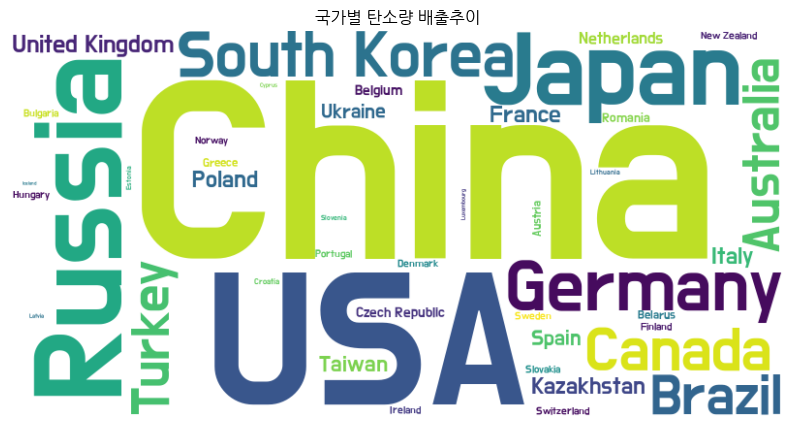

In [86]:
# 시각화 - 워드 클라우드
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('국가별 탄소량 배출추이')
plt.savefig('탄소워드크라우드.png', format='png')
plt.show()

<iframe width='400' height='500' frameborder='0' style='padding:10px 0;' src='https://wits.worldbank.org/en/W
idget/Chart/Country/BY-COUNTRY/StartYear/2017/EndYear/2021/Indicator/NY-GDP-MKTP-CD/Show/AUS;CAN;KOR;RUS;TUR/ChartType/column'></iframe>